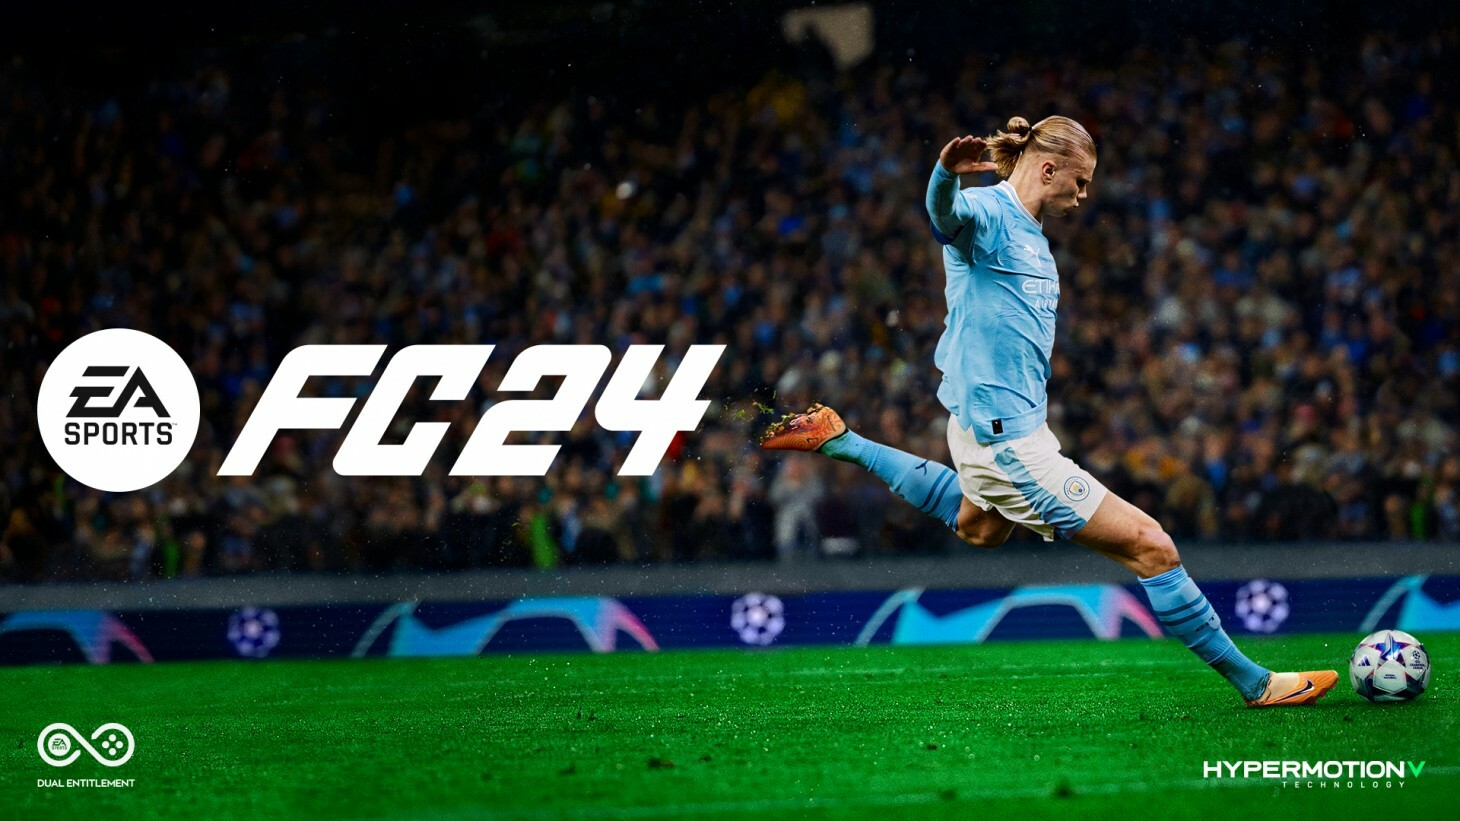

# 1.Introduction  


## *Data Cleaning & Transformation*
Guidline Questions I want to check:
1. Do the height and weight columns have the appropriate data types?
2. Should I seperate the player tags and transform it to dummy variables?


EDA Questions:
* Preferred Foot Distribution
* Who are the best 11 players in the dateset?




## *The  1M💲 Question:*
* Messi or Ronaldo? Who is the 🐐?


🔨 Tools:

*   Pandas and numpy for data manipulation
*   Dummy variables
*   Plotly and Seaborn for data visualization 📊



# 2.Dataset

⚠️ Warnings:

The FIFA players data was collected from sofifa, which is the most reliable website sharing this type of information. However, some issues regarding missing data still exist.
The mentality_compusure attribute did not exist in FIFA 15, so the field is blank in the dataset for all players in the version 15.
The goalkeeping_speed field is only provided on sofifa for goalkeepers.

# Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Load the Data file as Dataframe

In [3]:
# Load the csv file
data = pd.read_csv('drive/MyDrive/EA_SPORTS_FC_24/male_players.csv', encoding='latin1')

<ipython-input-3-f58ca267f6c5>:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drive/MyDrive/EA_SPORTS_FC_24/male_players.csv', encoding='latin1')


#3.Know The Data
working with features without understanding their meanings doesn't make sense and can be very wasteful in time and energy.

In [4]:
# Check how many rows and columns in the dataframe
rows, columns = data.shape
print(f"The DataFrame contains {rows} rows and {columns} columns.")

The DataFrame contains 180021 rows and 109 columns.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(18), int64(45), object(46)
memory usage: 149.7+ MB


In [6]:
# show the top 5 rows
data.head(5)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24,2,22/09/2023,K. MbappÃ©,Kylian MbappÃ© Lottin,"ST, LW",91,94,181500000.0,230000.0,24,20/12/1998,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,01/07/2018,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24,2,22/09/2023,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,21/07/2000,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,01/07/2022,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,22/09/2023,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,28/06/1991,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,30/08/2015,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24,2,22/09/2023,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,24/06/1987,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,16/07/2023,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153

In [7]:
# remove unnecessary columns
del data['player_url']

#4.Data Correctness
Always doubt the reliability of the data first.
It is possible that some errors were made when the data got collected.

Are there any duplicates?

In [8]:
data.duplicated().sum()

0

Are there Missing Values?

In [9]:
# Check for missing values in each column
missing_values = data.isna().sum().sort_values(ascending=False)

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
nation_jersey_number              169923
nation_position                   169923
nation_team_id                    169923
club_loaned_from                  169298
player_tags                       166103
goalkeeping_speed                 159997
player_traits                      98216
release_clause_eur                 59299
mentality_composure                32888
defending                          20024
passing                            20024
shooting                           20024
pace                               20024
physic                             20024
dribbling                          20024
club_joined_date                   12588
league_level                        2250
value_eur                           2153
club_team_id                        1865
club_name                           1865
league_id                           1865
league_name                         1865
club_position                       1865
club_jersey_number          

The main fields with missing data are:
 club_loaned_from, nation_team_id, nation_position, nation_jersey_number, player_tags, and goalkeeping_speed.

Data Transformation

In [10]:
# Do the height and weight columns have the appropriate data types?
weight, height = data['weight_kg'].dtype, data['height_cm'].dtype
print(f"The type of weight is {weight}")
print(f"The type of height is {height}")

The type of weight is int64
The type of height is int64


In [11]:
# Convert the feautures from int to float
data['height_cm'] = data['height_cm'].astype(float)
data['weight_kg'] = data['weight_kg'].astype(float)

In [12]:
# Should I seperate the player tags and transform it to dummy variables?
data['player_tags']

0         #Speedster, #Dribbler, #Acrobat, #Clinical fin...
1         #Aerial threat, #Distance shooter, #Strength, ...
2         #Dribbler, #Playmaker, #Distance shooter, #Cro...
3         #Dribbler, #Playmaker, #FK Specialist, #Acroba...
4         #Poacher, #Aerial threat, #Clinical finisher, ...
                                ...                        
180016                                                  NaN
180017                                                  NaN
180018                                                  NaN
180019                                                  NaN
180020                                                  NaN
Name: player_tags, Length: 180021, dtype: object

In [13]:
# Remove '#' symbol and split the strings to extract individual attributes
player_tags_split = data['player_tags'].str.replace('#', '').str.lower().str.split(', ')

# Create a set to store all unique attributes
unique_attributes = set()



In [14]:
# Iterate over each row to collect unique attributes
for row in player_tags_split.dropna(): # Skip NaN values
    unique_attributes.update(row)

In [15]:
# Convert set to a list to be used as columns in DataFrame
unique_attributes = list(unique_attributes)

In [16]:
# Create dummy variables for each unique attribute
dummy_variables = pd.DataFrame(0, index=data.index, columns=unique_attributes)

In [17]:
dummy_variables

,distance shooter,dribbler,clinical finisher,crosser,acrobat,tacticianâ,speedster,playmaker,complete forward,strength,fk specialist,playmakerâ,engine,complete defender,complete midfielder,tackling,tacklingâ,tactician,poacher,aerial threat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Check the column names in the dummy variables df
print(dummy_variables.columns)

Index(['distance shooter', 'dribbler', 'clinical finisher', 'crosser',
       'acrobat', 'tacticianâ ', 'speedster', 'playmaker', 'complete forward',
       'strength', 'fk specialist', 'playmakerâ ', 'engine',
       'complete defender', 'complete midfielder', 'tackling', 'tacklingâ ',
       'tactician', 'poacher', 'aerial threat'],
      dtype='object')


In [19]:
# Populate the dummy variables based on the presence of each attribute
for i, row in enumerate(player_tags_split.dropna()):  # Skip NaN values
    dummy_variables.loc[i, row] = 1

'playmakerâ ', 'tacticianâ ', and 'tacklingâ ' are typo errors and duplicates, so I remove those. Because of their non-ASCII code, I do it in manaul way.

In [20]:
columns_to_drop_indices = [6, 8, 10]
dummy_variables.drop(columns=dummy_variables.columns[columns_to_drop_indices], inplace=True)

In [21]:
dummy_variables

,distance shooter,dribbler,clinical finisher,crosser,acrobat,tacticianâ,playmaker,strength,playmakerâ,engine,complete defender,complete midfielder,tackling,tacklingâ,tactician,poacher,aerial threat
0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Rename the dummy variables to the pattern 'is_attribute'
dummy_variables.columns = ['is_' + col for col in dummy_variables.columns]

In [23]:
# Concatenate the dummy variables with the original DataFrame
data_with_dummies = pd.concat([data, dummy_variables], axis=1)

In [24]:
# Drop the original 'attributes' column if needed
data_with_dummies.drop('player_tags', axis=1, inplace=True)

In [25]:
# Ensure no duplicate columns are present
data_with_dummies = data_with_dummies.loc[:, ~data_with_dummies.columns.duplicated()]

In [26]:
data = data_with_dummies
data

,player_id,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,is_distance shooter,is_dribbler,is_clinical finisher,is_crosser,is_acrobat,is_tacticianâ,is_playmaker,is_strength,is_playmakerâ,is_engine,is_complete defender,is_complete midfielder,is_tackling,is_tacklingâ,is_tactician,is_poacher,is_aerial threat
0,231747,24,2,22/09/2023,K. MbappÃ©,Kylian MbappÃ© Lottin,"ST, LW",91,94,181500000.0,230000.0,24,20/12/1998,182.0,75.0,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,01/07/2018,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,239085,24,2,22/09/2023,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,21/07/2000,195.0,94.0,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,01/07/2022,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,192985,24,2,22/09/2023,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,28/06/1991,181.0,75.0,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,30/08/2015,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,158023,24,2,22/09/2023,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,24/06/1987,169.0,67.0,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,16/07/2023,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,0,1,1,0,1,0,1,0,0,0

# EDA *Questions*

In [27]:
data['overall'].describe()

count    180021.000000
mean         65.712711
std           7.018104
min          40.000000
25%          61.000000
50%          66.000000
75%          70.000000
max          94.000000
Name: overall, dtype: float64

In [28]:
result_series = data.loc[data['overall'].idxmax()]
result_series

player_id               158023
fifa_version                20
fifa_update                  2
update_as_of        19/09/2019
short_name            L. Messi
                       ...    
is_tackling                  0
is_tacklingâ                 0
is_tactician                 0
is_poacher                   0
is_aerial threat             0
Name: 75014, Length: 124, dtype: object

<ipython-input-29-c8ea59c43813>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='preferred_foot', palette='Set2', ax=ax, linewidth=1, edgecolor='black', alpha=0.8)


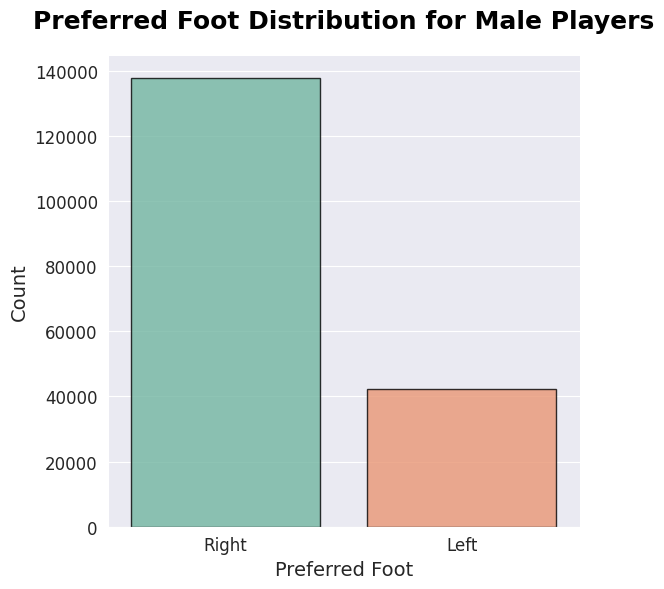

In [29]:
# Use seaborn's darkgrid style directly
sns.set_style('darkgrid')

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# Create count plot with adjusted bar width and shadow on bars
sns.countplot(data=data, x='preferred_foot', palette='Set2', ax=ax, linewidth=1, edgecolor='black', alpha=0.8)

# Set title and labels
ax.set_title('Preferred Foot Distribution for Male Players', fontsize=18, fontweight='bold', color='black', pad=20)
ax.set_xlabel('Preferred Foot', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()


# Best players per position All the Time



In [71]:
# Define a function to get the best player for a given position
def get_best_player(data, position, version = None, league=None, club_name = None):
    subset = data.copy()
    subset['player_positions'] = subset['player_positions'].str.split(',')

    if version != None:
        subset = subset[subset["fifa_version"]== version]
    if league != None:
        subset = subset[subset["league_name"]== league]
    if club_name != None:
        subset = subset[subset["club_name"]== club_name]

    subset = subset[subset['player_positions'].apply(lambda x: position in x)]

    if not subset.empty:
        best_player = subset.loc[subset['overall'].idxmax()]
        return best_player
    else:
        return None


# List of positions to find the best player for
positions = ['GK', 'CB', 'LB', 'RB', 'RWB', 'LWB', 'CDM', 'CM', 'CAM', 'RM', 'LM', 'RW', 'LW', 'ST', 'CF']

# Find and print the best player in each position
for position in positions:
    best_player = get_best_player(data, position)
    if best_player is not None:
        print(f"Best {position} Player: {best_player['short_name']} (Overall Rating: {best_player['overall']}) (Fifa: {best_player['fifa_version']})")
    else:
        print(f"No player found for position {position}")

Best GK Player: M. Neuer (Overall Rating: 92) (Fifa: 18)
Best CB Player: Sergio Ramos (Overall Rating: 91) (Fifa: 19)
Best LB Player: JoÃ£o Cancelo (Overall Rating: 88) (Fifa: 23)
Best RB Player: P. Lahm (Overall Rating: 88) (Fifa: 17)
Best RWB Player: R. James (Overall Rating: 84) (Fifa: 23)
Best LWB Player: Grimaldo (Overall Rating: 84) (Fifa: 24)
Best CDM Player: N. KantÃ© (Overall Rating: 90) (Fifa: 22)
Best CM Player: K. De Bruyne (Overall Rating: 91) (Fifa: 24)
Best CAM Player: K. De Bruyne (Overall Rating: 91) (Fifa: 21)
Best RM Player: A. Robben (Overall Rating: 90) (Fifa: 16)
Best LM Player: S. ManÃ© (Overall Rating: 89) (Fifa: 23)
Best RW Player: L. Messi (Overall Rating: 94) (Fifa: 20)
Best LW Player: Cristiano Ronaldo (Overall Rating: 94) (Fifa: 18)
Best ST Player: Cristiano Ronaldo (Overall Rating: 94) (Fifa: 19)
Best CF Player: L. Messi (Overall Rating: 94) (Fifa: 19)


# Best players per position In EA SPORTS FC 24


In [68]:
for position in positions:
    best_player_24 = get_best_player(data , position, version=24 )
    print(f"Best {position} Player: {best_player_24['short_name']} (Overall Rating: {best_player_24['overall'] })")

Best GK Player: T. Courtois (Overall Rating: 90)
Best CB Player: RÃºben Dias (Overall Rating: 89)
Best LB Player: JoÃ£o Cancelo (Overall Rating: 86)
Best RB Player: T. Alexander-Arnold (Overall Rating: 86)
Best RWB Player: J. Frimpong (Overall Rating: 83)
Best LWB Player: Grimaldo (Overall Rating: 84)
Best CDM Player: Rodri (Overall Rating: 89)
Best CM Player: K. De Bruyne (Overall Rating: 91)
Best CAM Player: Bruno Fernandes (Overall Rating: 88)
Best RM Player: R. Mahrez (Overall Rating: 86)
Best LM Player: K. Coman (Overall Rating: 85)
Best RW Player: M. Salah (Overall Rating: 89)
Best LW Player: Vini Jr. (Overall Rating: 89)
Best ST Player: K. MbappÃ© (Overall Rating: 91)
Best CF Player: L. Messi (Overall Rating: 90)


# Best players per position In EA SPORTS FC 24 which play in the Premier League(England)

In [69]:
for position in positions:
    best_player_premier_league = get_best_player(data, position, version=24, league="Premier League")
    print(f"Best {position} Player: {best_player_premier_league['short_name']} (Overall Rating: {best_player_premier_league['overall'] })")

Best GK Player: Alisson (Overall Rating: 89)
Best CB Player: RÃºben Dias (Overall Rating: 89)
Best LB Player: A. Robertson (Overall Rating: 86)
Best RB Player: T. Alexander-Arnold (Overall Rating: 86)
Best RWB Player: N. Williams (Overall Rating: 74)
Best LWB Player: R. Giles (Overall Rating: 74)
Best CDM Player: Rodri (Overall Rating: 89)
Best CM Player: K. De Bruyne (Overall Rating: 91)
Best CAM Player: Bruno Fernandes (Overall Rating: 88)
Best RM Player: M. Diaby (Overall Rating: 84)
Best LM Player: K. Mitoma (Overall Rating: 80)
Best RW Player: M. Salah (Overall Rating: 89)
Best LW Player: H. Son (Overall Rating: 87)
Best ST Player: E. Haaland (Overall Rating: 91)
Best CF Player: C. Nkunku (Overall Rating: 86)


In [74]:
# Find and print the best player in each position for FC Barcelona
for position in positions:
    best_player_barcelona = get_best_player(data, position, club_name="FC Barcelona")
    if best_player_barcelona is not None:
        print(f"Best {position} Player in FC Barcelona: {best_player_barcelona['short_name']} (Overall Rating: {best_player_barcelona['overall']}) (Fifa: {best_player_barcelona['fifa_version']})")
    else:
        print(f"No player found for position {position} in FC Barcelona")


Best GK Player in FC Barcelona: M. ter Stegen (Overall Rating: 90) (Fifa: 22)
Best CB Player in FC Barcelona: PiquÃ© (Overall Rating: 88) (Fifa: 20)
Best LB Player in FC Barcelona: Jordi Alba (Overall Rating: 87) (Fifa: 20)
Best RB Player in FC Barcelona: Sergi Roberto (Overall Rating: 84) (Fifa: 19)
No player found for position RWB in FC Barcelona
No player found for position LWB in FC Barcelona
Best CDM Player in FC Barcelona: Sergio Busquets (Overall Rating: 89) (Fifa: 20)
Best CM Player in FC Barcelona: Iniesta (Overall Rating: 89) (Fifa: 15)
Best CAM Player in FC Barcelona: Coutinho (Overall Rating: 83) (Fifa: 21)
Best RM Player in FC Barcelona: A. Turan (Overall Rating: 83) (Fifa: 16)
Best LM Player in FC Barcelona: Denis SuÃ¡rez (Overall Rating: 80) (Fifa: 17)
Best RW Player in FC Barcelona: L. Messi (Overall Rating: 94) (Fifa: 20)
Best LW Player in FC Barcelona: Neymar Jr (Overall Rating: 92) (Fifa: 17)
Best ST Player in FC Barcelona: L. SuÃ¡rez (Overall Rating: 92) (Fifa: 18)


# Messi or Ronaldo?  Let's settle it up!

The long-standing debate about who is the best player in the world, and the truth is that it is difficult to decide between the Argentine and the Portuguese. So this time let's not be too smart and let the data speak (my tendency says Messi)

In [30]:
messi = data["short_name"].str.contains("L. Messi")
messi = data[messi]
messi

,player_id,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,is_distance shooter,is_dribbler,is_clinical finisher,is_crosser,is_acrobat,is_tacticianâ,is_playmaker,is_strength,is_playmakerâ,is_engine,is_complete defender,is_complete midfielder,is_tackling,is_tacklingâ,is_tactician,is_poacher,is_aerial threat
3,158023,24,2,22/09/2023,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,24/06/1987,169.0,67.0,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,16/07/2023,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
18351,158023,23,2,26/09/2022,L. Messi,Lionel AndrÃ©s Messi Cuccittini,RW,91,91,54000000.0,195000.0,35,24/06/1987,169.0,67.0,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,RW,30.0,NaN,10/08/2021,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,99900000.0,"Finesse Shot, Long Shot Taker (AI), Playmaker ...",81.0,89.0,90.0,94.0,34.0,64.0,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96.0,20,35,24,6,11,15,14,8,NaN,87+3,87+3,87+3,90,91,91,91,90,92-1,92-1,92-1,89+2,85+3,85+3,85+3,89+2,64+3,63+3,63+3,63+3,64+3,59+3,50+3,50+3,50+3,59+3,19+3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36883,158023,22,2,23/09/2021,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,24/06/1987,170.0,72.0,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,RW,30.0,NaN,10/08/2021,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96.0,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56122,158023,21,2,23/09/2020,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,24/06/1987,170.0,72.0,241.0,FC Barcelona,53.0,La Liga,1.0,CAM,10.0,NaN,01/07/2004,2021.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,138400000.0,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96.0,32,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,

In [31]:
ronaldo = data["short_name"].str.contains("Cristiano Ronaldo")
ronaldo = data[ronaldo]
ronaldo

,player_id,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,is_distance shooter,is_dribbler,is_clinical finisher,is_crosser,is_acrobat,is_tacticianâ,is_playmaker,is_strength,is_playmakerâ,is_engine,is_complete defender,is_complete midfielder,is_tackling,is_tacklingâ,is_tactician,is_poacher,is_aerial threat
49,20801,24,2,22/09/2023,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,86,86,23000000.0,66000.0,38,05/02/1985,187.0,85.0,112139.0,Al Nassr,350.0,Pro League,1.0,ST,7.0,NaN,01/01/2023,2025.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,36800000.0,"Power Shot +, Power Header, Flair, Trivela, Ac...",77.0,88.0,75.0,80.0,34.0,74.0,76,87,87,76,83,77,79,75,70,86,73,80,76,87,61,92,93,77,76,85,62,29,90,76,90,92.0,24,32,24,7,11,15,14,11,NaN,85+1,85+1,85+1,81,83,83,83,81,81+3,81+3,81+3,80+3,75+3,75+3,75+3,80+3,59+3,57+3,57+3,57+3,59+3,56+3,52+3,52+3,52+3,56+3,19+3,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
18356,20801,23,2,26/09/2022,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,90,90,41000000.0,220000.0,37,05/02/1985,187.0,83.0,11.0,Manchester United,13.0,Premier League,1.0,SUB,7.0,NaN,27/08/2021,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,77900000.0,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",81.0,92.0,78.0,85.0,34.0,75.0,80,93,90,80,86,85,81,79,75,88,79,83,77,94,67,93,95,76,77,90,63,29,95,76,90,95.0,24,32,24,7,11,15,14,11,NaN,89+1,89+1,89+1,86,88,88,88,86,85+3,85+3,85+3,84+3,78+3,78+3,78+3,84+3,62+3,59+3,59+3,59+3,62+3,58+3,53+3,53+3,53+3,58+3,20+3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36887,20801,22,2,23/09/2021,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,05/02/1985,187.0,83.0,11.0,Manchester United,13.0,Premier League,1.0,ST,7.0,NaN,27/08/2021,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95.0,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56123,20801,21,2,23/09/2020,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,05/02/1985,187.0,83.0,45.0,Juventus,31.0,Serie A,1.0,LS,7.0,NaN,10/07/2018,2022.0,38,Portugal,1354.0,LS,7.0,Right,4,5,5,High/Low,Unique,Yes,75900000.0,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95.0,28,32,24,7,11,15,14,11,NaN,91+1,91+1,91+1,89,91,91,91,89,88+3,88+3,88+3,88+3,81+3,81+3

In [32]:
price_messi = messi['value_eur'].mean()
price_ronaldo = ronaldo['value_eur'].mean()
print(f"The mean price of messi is {int(price_messi)}\n")
print(f"The mean price of ronaldo is {int(price_ronaldo)}")

The mean price of messi is 88800000

The mean price of ronaldo is 65450000


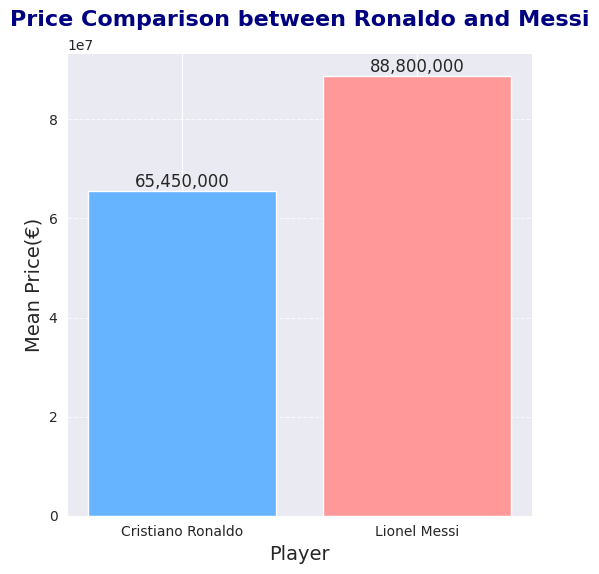

In [33]:
# Define data
mean_prices = [price_ronaldo, price_messi]
labels = ['Cristiano Ronaldo', 'Lionel Messi']

# Define colors using a gradient based on mean prices
colors = ['#66b3ff', '#ff9999']

# Create bar chart with gradient colors
plt.figure(figsize=(6, 6))  # Adjust size if necessary
bars = plt.bar(labels, mean_prices, color=colors)

# Add data labels on top of the bars with commas and no trailing zeros
for bar, price in zip(bars, mean_prices):
    formatted_price = '{:,.{prec}f}'.format(price, prec=0 if int(price) == price else 1)  # Format price with commas and no trailing zeros
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, formatted_price, ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Player', fontsize=14)
plt.ylabel('Mean Price(€)', fontsize=14)
plt.title('Price Comparison between Ronaldo and Messi', pad=20, fontsize=16, fontweight='bold', color='navy')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

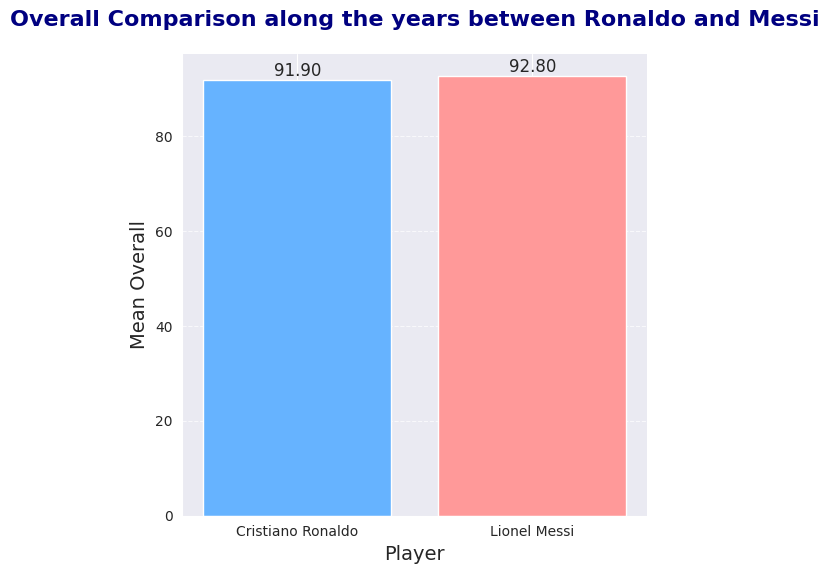

In [34]:
# Define data
mean_overalls = [ronaldo['overall'].mean(), messi['overall'].mean()]
labels = ['Cristiano Ronaldo', 'Lionel Messi']

# Define colors using a gradient based on mean prices
colors = ['#66b3ff', '#ff9999']

# Create bar chart with gradient colors
plt.figure(figsize=(6, 6))  # Adjust size if necessary
bars = plt.bar(labels, mean_overalls, color=colors)

# Add data labels on top of the bars with commas and no trailing zeros
for bar, overall in zip(bars, mean_overalls):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{overall:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Player', fontsize=14)
plt.ylabel('Mean Overall', fontsize=14)
plt.title('Overall Comparison along the years between Ronaldo and Messi', pad=20, fontsize=16, fontweight='bold', color='navy')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

If we need to decide about those 2 parameters : overall and price.
The conclusion is clear- **The winner is messi!**



In [35]:
from tabulate import tabulate

# Sort the DataFrame based on the 'overall' rating in descending order
sorted_data = data.sort_values(by='overall', ascending=False)

# Select the top 11 players
best_11_players = sorted_data.head(11)

# Display the best 11 players
print(tabulate(best_11_players, headers='keys', tablefmt='fancy_grid'))

╒════════╤═════════════╤════════════════╤═══════════════╤════════════════╤═══════════════════╤═════════════════════════════════════╤════════════════════╤═══════════╤═════════════╤═════════════╤════════════╤═══════╤════════════╤═════════════╤═════════════╤════════════════╤═════════════════════╤═════════════╤═══════════════╤════════════════╤═════════════════╤══════════════════════╤════════════════════╤════════════════════╤══════════════════════════════════╤══════════════════╤════════════════════╤══════════════════╤═══════════════════╤════════════════════════╤══════════════════╤═════════════╤═══════════════╤════════════════════════════╤═══════════════╤═════════════╤═════════════╤══════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════╤════════════╤═══════════╤═════════════╤═════════════╤══════════╤══════════════════════╤═══════════════════════╤══════════════════════════════╤══

If we were in the neighborhood playing soccer like kids and we were required to choose the best 11.
According to the data, it is again about Ronaldo and Messi. **Another proof that these are the 2 greatest players in history!**

Another nice angle to look at - look at how many times Messi was selected and how many Ronaldo, you can compare it to the number of Ballon d'Ors Messi received compared to the Golden Balls Ronaldo received.